In [1]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report


from wordcloud import WordCloud, STOPWORDS


from sklearn.feature_extraction.text import CountVectorizer


from sklearn.model_selection import train_test_split


from sklearn.naive_bayes import MultinomialNB


from sklearn.pipeline import Pipeline


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:/Users/vchin/OneDrive/Desktop/DSBDA_PROJECT/data/spam.csv', encoding='latin-1')

In [3]:
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  5572
Number of columns are:  5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 403


In [7]:
df.isnull().sum()


v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [8]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [9]:
df.describe(include= 'all').round(2)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [10]:
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in v1 is 2
No. of unique values in v2 is 5169
No. of unique values in Unnamed: 2 is 43
No. of unique values in Unnamed: 3 is 10
No. of unique values in Unnamed: 4 is 5


In [11]:
df.rename(columns={"v1": "Category", "v2": "Message"}, inplace=True)


In [12]:
df.drop(columns={'Unnamed: 2','Unnamed: 3','Unnamed: 4'}, inplace=True)


In [13]:
df['Spam'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)


In [14]:
df.head()


,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [15]:
spread = df['Category'].value_counts()
plt.rcParams['figure.figsize'] = (5,5)

Text(0.5, 1.0, 'Distribution of Spam vs Ham')

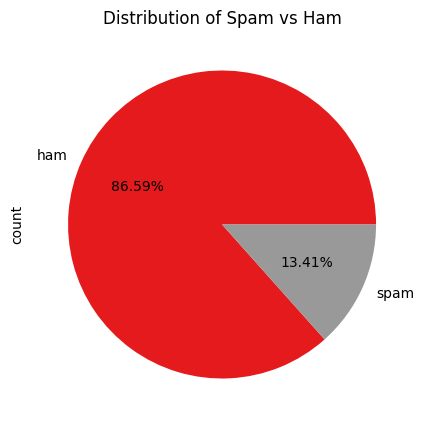

In [16]:
spread.plot(kind = 'pie', autopct='%1.2f%%', cmap='Set1')
plt.title(f'Distribution of Spam vs Ham')

In [17]:
plt.show()

In [18]:
df_spam = df[df['Category']=='spam'].copy()

In [19]:
comment_words = ''

In [20]:
stopwords = set(STOPWORDS)

In [21]:

for val in df_spam.Message:


    val = str(val)

    
    tokens = val.split()

    
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

In [22]:
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_words = 1000,
                colormap = 'gist_heat_r').generate(comment_words)

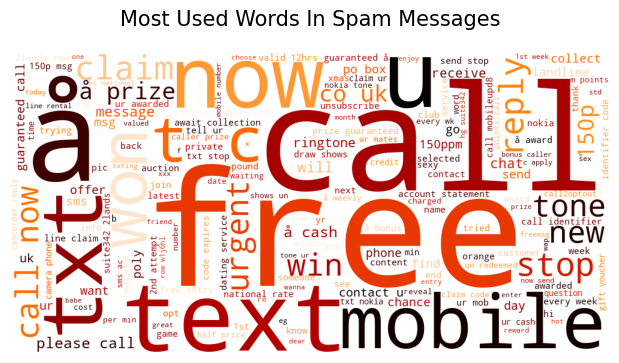

In [23]:

plt.figure(figsize = (6,6), facecolor = None)
plt.title('Most Used Words In Spam Messages', fontsize = 15, pad=20)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


Train ROC AUC: 0.9852687267795479
Test ROC AUC: 0.9411604568302393


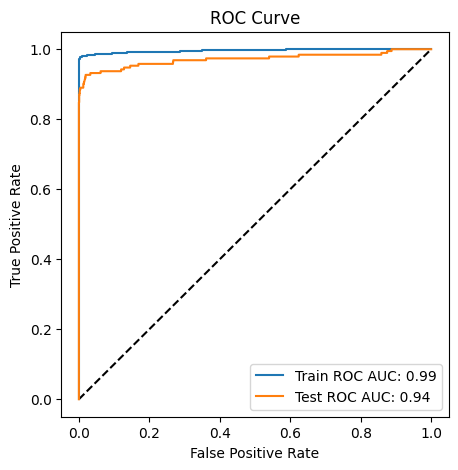

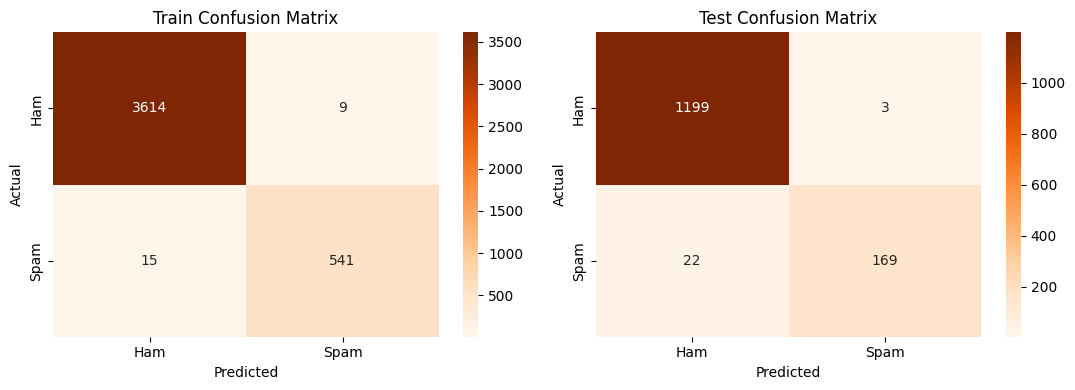


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.995867 | 0.997516 |   0.996691 | 3623        |
| 1            |    0.983636 | 0.973022 |   0.9783   |  556        |
| accuracy     |    0.994257 | 0.994257 |   0.994257 |    0.994257 |
| macro avg    |    0.989751 | 0.985269 |   0.987495 | 4179        |
| weighted avg |    0.994239 | 0.994257 |   0.994244 | 4179        |

Test Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.981982 | 0.997504 |   0.989682 | 1202        |
| 1            |    0.982558 | 0.884817 |   0.931129 |  191        |
| accuracy     |    0.982053 | 0.982053 |   0.982053 |    0.982053 |
| macro avg    |    0.98227  | 0.94116  |   0.960406 | 1393        |
| weighted avg |    0.982061 | 0.982053 |   

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df.Message, df.Spam, test_size=0.25, random_state=42)


def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    pred_prob_train = model.predict_proba(X_train)[:, 1]
    pred_prob_test = model.predict_proba(X_test)[:, 1]

    roc_auc_train = roc_auc_score(y_train, y_pred_train)
    roc_auc_test = roc_auc_score(y_test, y_pred_test)
    print("\nTrain ROC AUC:", roc_auc_train)
    print("Test ROC AUC:", roc_auc_test)

    fpr_train, tpr_train, _ = roc_curve(y_train, pred_prob_train)
    fpr_test, tpr_test, _ = roc_curve(y_test, pred_prob_test)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_train, tpr_train, label=f"Train ROC AUC: {roc_auc_train:.2f}")
    plt.plot(fpr_test, tpr_test, label=f"Test ROC AUC: {roc_auc_test:.2f}")
    plt.legend()
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    sns.heatmap(cm_train, annot=True, cmap="Oranges", fmt='g', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'], ax=ax[0])
    ax[0].set_title("Train Confusion Matrix")
    ax[0].set_xlabel("Predicted")
    ax[0].set_ylabel("Actual")

    sns.heatmap(cm_test, annot=True, cmap="Oranges", fmt='g', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'], ax=ax[1])
    ax[1].set_title("Test Confusion Matrix")
    ax[1].set_xlabel("Predicted")
    ax[1].set_ylabel("Actual")
    plt.tight_layout()
    plt.show()

    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    print(pd.DataFrame(cr_train).T.to_markdown())
    print("\nTest Classification Report:")
    print(pd.DataFrame(cr_test).T.to_markdown())

    # Metrics
    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']
    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']
    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)

    model_score = [
        precision_train, precision_test, recall_train, recall_test,
        acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test
    ]
    return model_score


clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])


MultinomialNB_score = evaluate_model(clf, X_train, X_test, y_train, y_test)



def detect_spam(email_text):
    prediction = clf.predict([email_text])
    return "This is a Spam Email!" if prediction[0] == 1 else "This is a Ham Email!"


sample_email = 'Free Tickets for IPL'
result = detect_spam(sample_email)
print("\nSample Email Prediction:", result)